In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("data.csv")

In [3]:
#data cleaning and removing outliers
data.fillna(data.mean())
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
data = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]

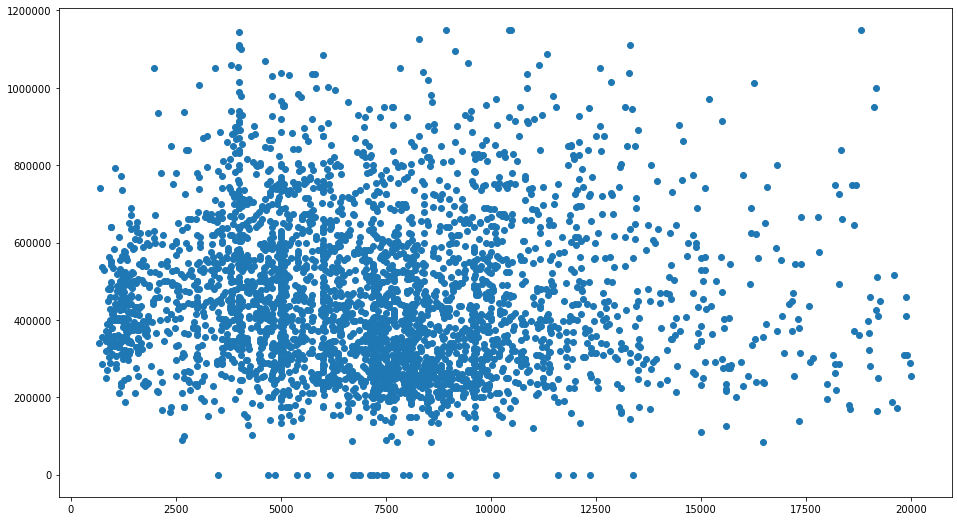

In [4]:
plt.figure('fig1', figsize=(16,9))
plt.scatter(data[['sqft_lot']], data[['price']])
plt.ticklabel_format(style='plain')
plt.show()

In [5]:
#training testing data split
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['sqft_lot']])
train_y = np.asanyarray(train[['price']])
regr.fit(train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-2.07991831]]
Intercept:  [470527.92614123]


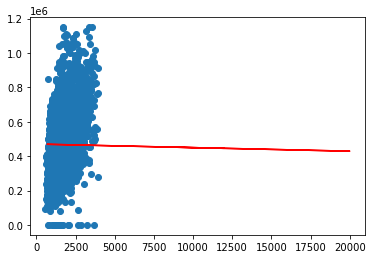

In [7]:
plt.scatter(train.sqft_above, train.price)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')


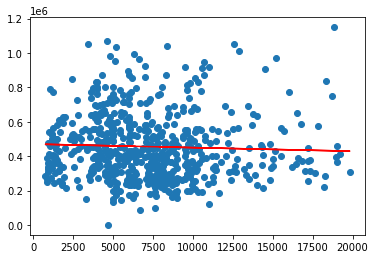

In [8]:
test_x = np.asanyarray(test[['sqft_lot']])
test_y = np.asanyarray(test[['price']])
test_y_hat = regr.predict(test_x)
plt.scatter(test_x,test_y)
plt.plot(test_x,test_y_hat,'-r')